## 实验题目1 拉格朗日(Lagrange)插值

### 代码实现

In [174]:
using Printf
using LinearAlgebra
using Plots

In [175]:
# Lagrange Interpolation method
function lagrange(xs, fxs, x::Number)
    # plot(xs,ys)
    num = size(xs, 1)
    y, i = 0.0, 1
    while i <= num
        li = 1.0
        # for j in filter(x -> x != i, 1:num)  # much slower than continue
        for j in 1:num
            if j == i
                continue
            end
            li *= (x - xs[j]) / (xs[i] - xs[j])
        end
        y += li * fxs[i]
        i += 1
    end
    x, y
end
function lagrange(xs, fxs, x::Vector)
    # plot(xs,ys)
    num = size(xs, 1)
    y, i = zeros(size(x, 1)), 1
    li = zeros(size(x, 1))  # 两种写法孰优孰劣还不好说，得写代码来验证
    while i <= num
        li .= 1.0
        # li = repeat([1.0], size(x, 1))
        # for j in filter(x -> x != i, 1:num)  # much slower than continue
        for j in 1:num
            if j == i
                continue
            end
            li = li .* (x .- xs[j]) / (xs[i] - xs[j])
        end
        y = y + li .* fxs[i]
        i += 1
    end
    x, y
end

lagrange (generic function with 2 methods)

### 测试代码

#### Test 1 - Simple

In [176]:
xs = [0, 2, 3, 5, 6]
ys = [1, 3, 2, 5, 6]
# xs = [x for x in 1:1000]
# ys = [y^2 for y in 1:1000]
# 多项式插值法的弊端，当n过大会导致失真
xs = [0.4,0.55,.65,.80]
ys = [.41075,.57815,.69675,0.88811]
@time lagrange(xs, ys, 0.55)
# Todo: 添加动态作图。注意，这不同于牛顿插值，不能直接动态作图，只能用循环重复计算实现

  0.016725 seconds (19.91 k allocations: 1.103 MiB, 99.77% compilation time)


(0.55, 0.57815)

### 实验题目

#### 问题 1

拉格朗日插值多项式的次数n越大越好吗？
 
> 不是，若是次数过高，会出现Runge现象，插值多项式在距离已知点位置较远处会剧烈震荡，直观呈现如下列问题所做图所示


In [177]:
function show_result(f::Function, split_nums::Vector, test_x::Vector, xlim::Vector, ylim::Vector)
    for n in split_nums
        x_min, x_max = xlim
        x_range = x_min-0.2:0.02:x_max+0.2
        xs = x_min:(x_max-x_min)/n:x_max
        ys = f.(xs)

        # (xlim=(xMin,xMax), ylim=(yMin, yMax), yflip = false)
        # https://stackoverflow.com/questions/53230969/how-to-scale-a-plot-in-julia-using-plots-jl
        plot(x_range, f.(x_range), label="f(x)")  # plot f(x)
        plot!(legend=:outertopright)
        plot!(ylim=ylim, yflip=false)  # add ylim
        plot!(xs, ys, seriestype=:scatter, markersize=3, msw=1, color=:deepskyblue, label="sample")  # add sample for lagrange interporlation

        test_y = f.(test_x)
        plot!(test_x, test_y, seriestype=:scatter, markersize=3, msw=1, color=:blue, label="true")  # add test x & y, plot true points
        @time _, pred_y = lagrange(xs, ys, test_x)
        println("n=$n\tpred_y=$pred_y")

        series_x = Vector(x_range)
        _, series_y = lagrange(xs, ys, series_x)  # compute the interporlation function points
        plot!(series_x, series_y, label="p(x)")  # add p(x) function curve
        display(plot!(test_x, pred_y, seriestype=:scatter, markersize=3, msw=1, color=:red, label="approx"))  # add pred_y by lagrange interporlation
    end
end

show_result (generic function with 5 methods)

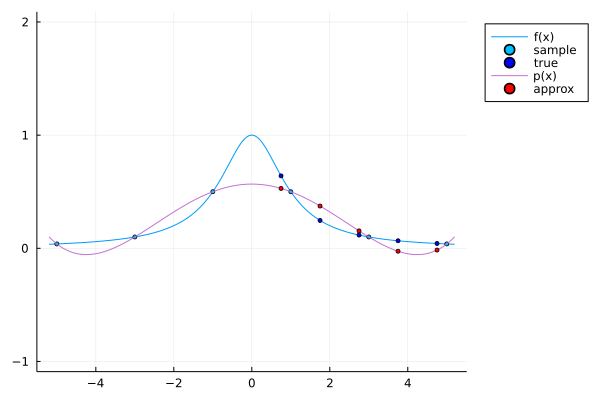

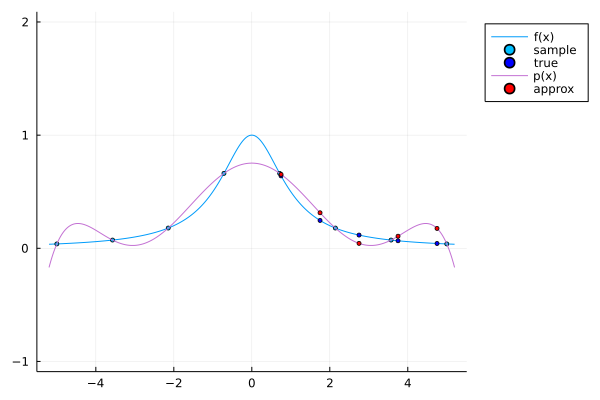

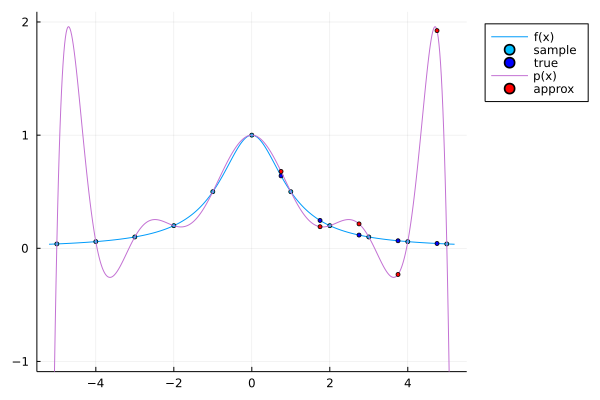

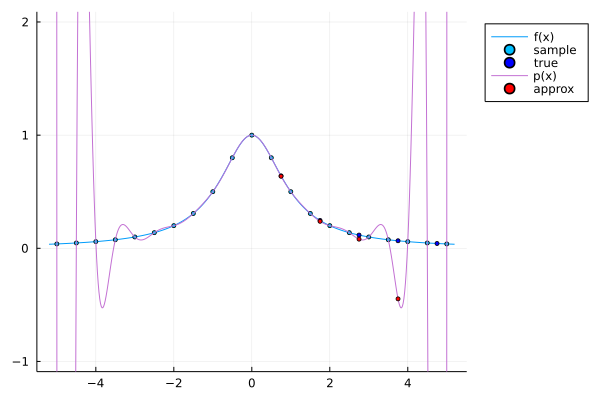

  0.092543 seconds (78.46 k allocations: 3.996 MiB, 99.93% compilation time)
n=5	pred_y=[0.528973858173077, 0.3733248197115384, 0.15373347355769232, -0.025954026442307696, -0.015737680288461536]
  0.000009 seconds (132 allocations: 12.281 KiB)
n=7	pred_y=[0.6533047653017958, 0.31379967166685296, 0.0434340608859752, 0.10673551280299334, 0.1755677906090149]
  0.000055 seconds (246 allocations: 22.969 KiB)
n=10	pred_y=[0.678989577293396, 0.19058046675375687, 0.21559187891256765, -0.23146174989674442, 1.9236311497192042]
  0.000038 seconds (886 allocations: 82.969 KiB)
n=20	pred_y=[0.6367553359164332, 0.23844593373813264, 0.08065999342165572, -0.44705196070883363, -39.95244903304101]


In [178]:
f(x) = 1 / (1 + x^2)
split_nums = [5, 7, 10, 20]
test_x = [0.75, 1.75, 2.75, 3.75, 4.75]
xlim = [-5, 5]
ylim = [-1, 2]
show_result(f, split_nums, test_x, xlim, ylim)


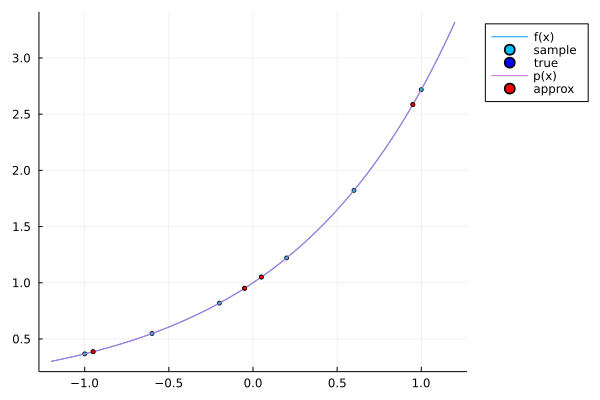

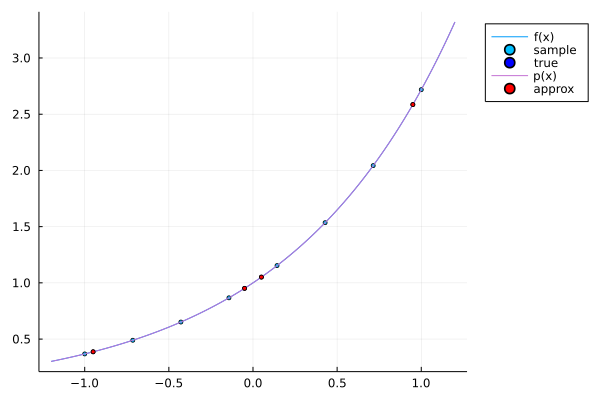

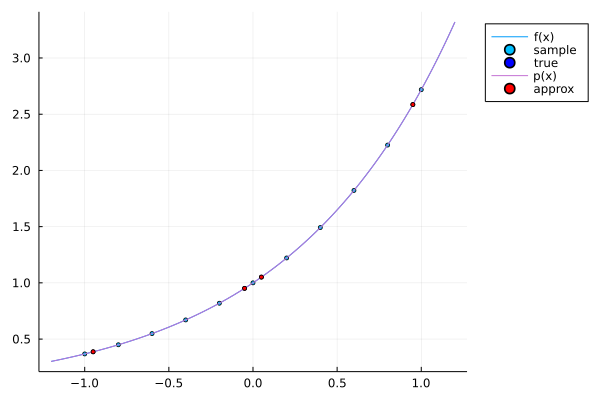

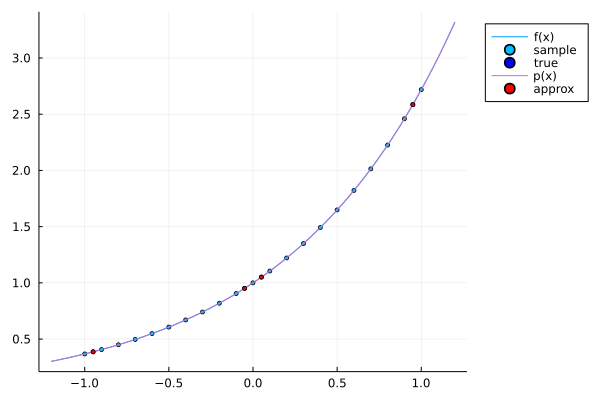

  0.000008 seconds (76 allocations: 7.031 KiB)
n=5	pred_y=[0.38679815885799357, 0.9512483333804465, 1.051290275808478, 2.5857845509846147]
  0.000008 seconds (132 allocations: 12.281 KiB)
n=7	pred_y=[0.38674157765331735, 0.9512293831940187, 1.051271054609406, 2.585710343552207]
  0.000011 seconds (246 allocations: 22.969 KiB)
n=10	pred_y=[0.3867410232556747, 0.9512294244990149, 1.0512710963777372, 2.585709659548761]
  0.000030 seconds (886 allocations: 82.969 KiB)
n=20	pred_y=[0.3867410234532931, 0.9512294245007142, 1.0512710963760243, 2.585709659315182]


In [179]:
f(x) = exp(x)
split_nums = [5, 7, 10, 20]
test_x = [-0.95, -0.05, 0.05, 0.95]
xlim = [-1, 1]
# ylim = [-1, 10]  # the good-looking ylim is defined manually
ylim = []
show_result(f, split_nums, test_x, xlim, ylim)

#### 问题 2

插值区间越小越好吗?

> 不是，这取决于函数的性质



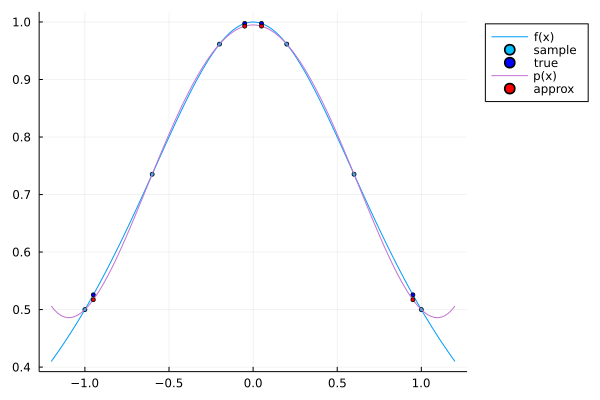

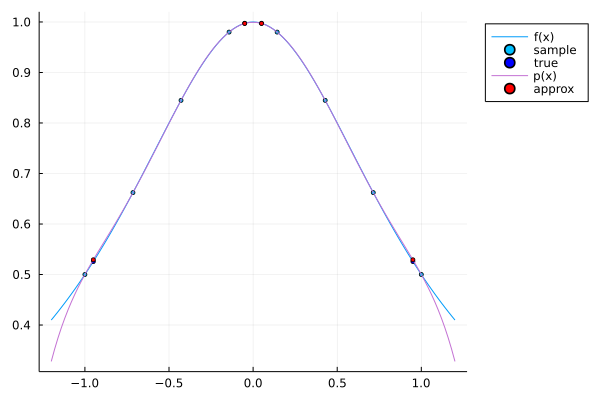

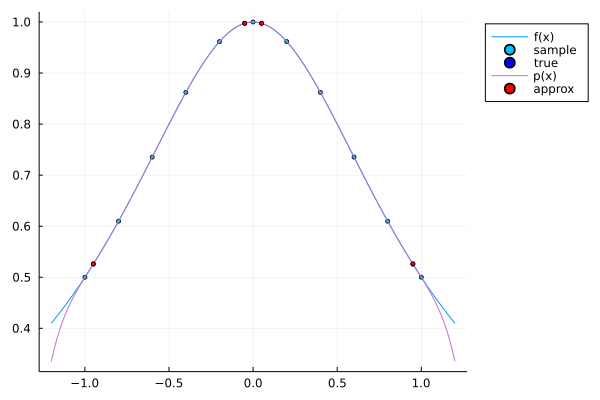

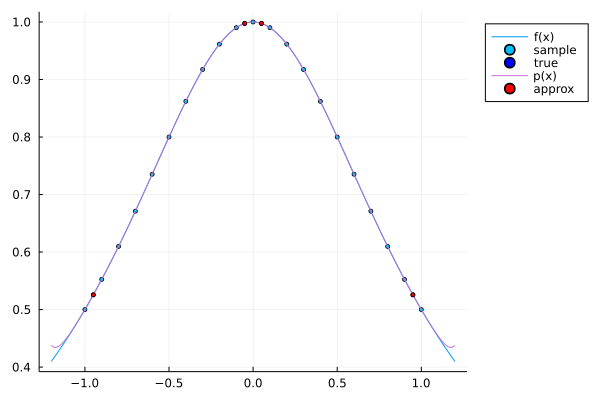

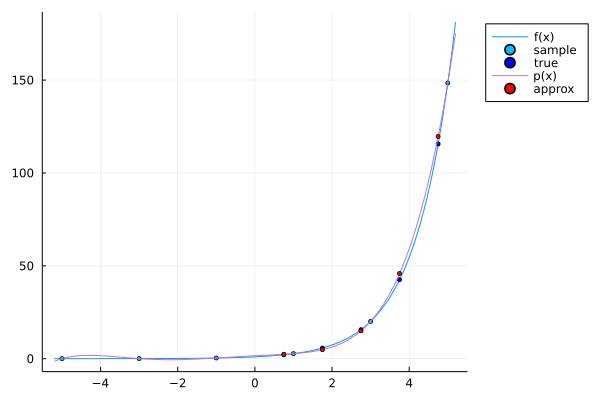

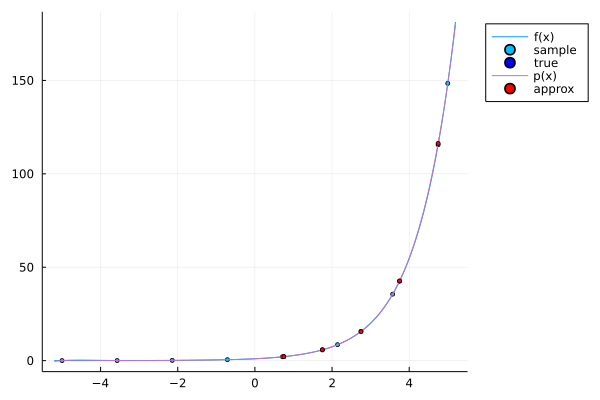

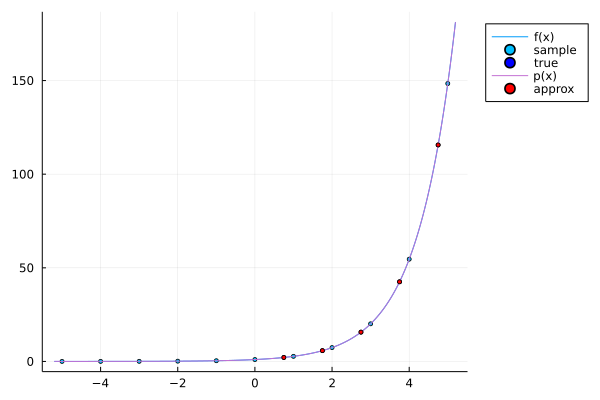

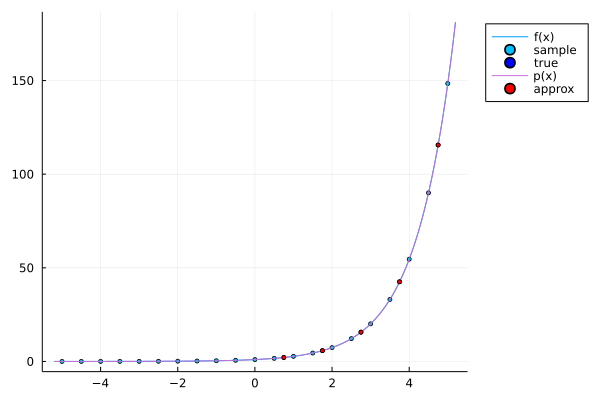

  0.000008 seconds (76 allocations: 7.031 KiB)
n=5	pred_y=[0.517147288602941, 0.992790670955882, 0.9927906709558821, 0.5171472886029413]
  0.000012 seconds (132 allocations: 12.281 KiB)
n=7	pred_y=[0.5291184785440569, 0.9970569582781557, 0.9970569582781555, 0.529118478544057]
  0.000012 seconds (246 allocations: 22.969 KiB)
n=10	pred_y=[0.5264079831033747, 0.9975068566175541, 0.9975068566175546, 0.5264079831033778]
  0.000063 seconds (886 allocations: 82.969 KiB)
n=20	pred_y=[0.5256203657463834, 0.997506234424685, 0.997506234424685, 0.5256203657468875]
  0.000006 seconds (76 allocations: 7.031 KiB)
n=5	pred_y=[2.373956870299596, 4.871634881082521, 15.008060923792579, 45.86225677574345, 119.62100705608145]
  0.000029 seconds (132 allocations: 12.281 KiB)
n=7	pred_y=[2.1197075995991295, 5.794726280634516, 15.538666112998783, 42.63661723222653, 116.27966322193161]
  0.000012 seconds (246 allocations: 22.969 KiB)
n=10	pred_y=[2.1171358945697327, 5.754367325591778, 15.643248061194516, 42.51

In [180]:
f(x) = 1 / (1 + x^2)
split_nums = [5, 7, 10, 20]
test_x = [-0.95, -0.05, 0.05, 0.95]
xlim = [-1, 1]
# ylim = [-1, 2]
ylim = []
show_result(f, split_nums, test_x, xlim, ylim)

f(x) = exp(x)
split_nums = [5, 7, 10, 20]
test_x = [0.75, 1.75, 2.75, 3.75, 4.75]
xlim = [-5, 5]
# ylim = [-1, 10]  # the good-looking ylim is defined manually
ylim = []
show_result(f, split_nums, test_x, xlim, ylim)

#### 问题 4 

考虑拉格朗日插值问题，内插比外推更可靠吗？

> 不一定，这取决于函数的性质

In [181]:
function show_result(f::Function, split_nums::Nothing, split_xs::Vector, test_x, xlim, ylim)
    x_min, x_max = xlim
    x_range = x_min:1:x_max+0.2  # x_min cannot be negative
    xs = split_xs
    ys = f.(xs)

    plot(x_range, f.(x_range), label="f(x)", dpi=300)  # plot f(x)
    plot!(legend=:outertopright)
    plot!(ylim=ylim, yflip=false)  # add ylim
    plot!(xs, ys, seriestype=:scatter, markersize=3, msw=1, color=:deepskyblue, label="sample")  # add sample for lagrange interporlation

    test_y = f.(test_x)
    plot!(test_x, test_y, seriestype=:scatter, markersize=3, msw=1, color=:blue, label="true")  # add test x & y, plot true points
    @time _, pred_y = lagrange(xs, ys, test_x)
    println("pred_y=$pred_y")

    series_x = Vector(x_range)
    _, series_y = lagrange(xs, ys, series_x)  # compute the interporlation function points
    plot!(series_x, series_y, label="p(x)")  # add p(x) function curve
    display(plot!(test_x, pred_y, seriestype=:scatter, markersize=3, msw=1, color=:red, label="approx"))  # add pred_y by lagrange interporlation
end

show_result (generic function with 5 methods)

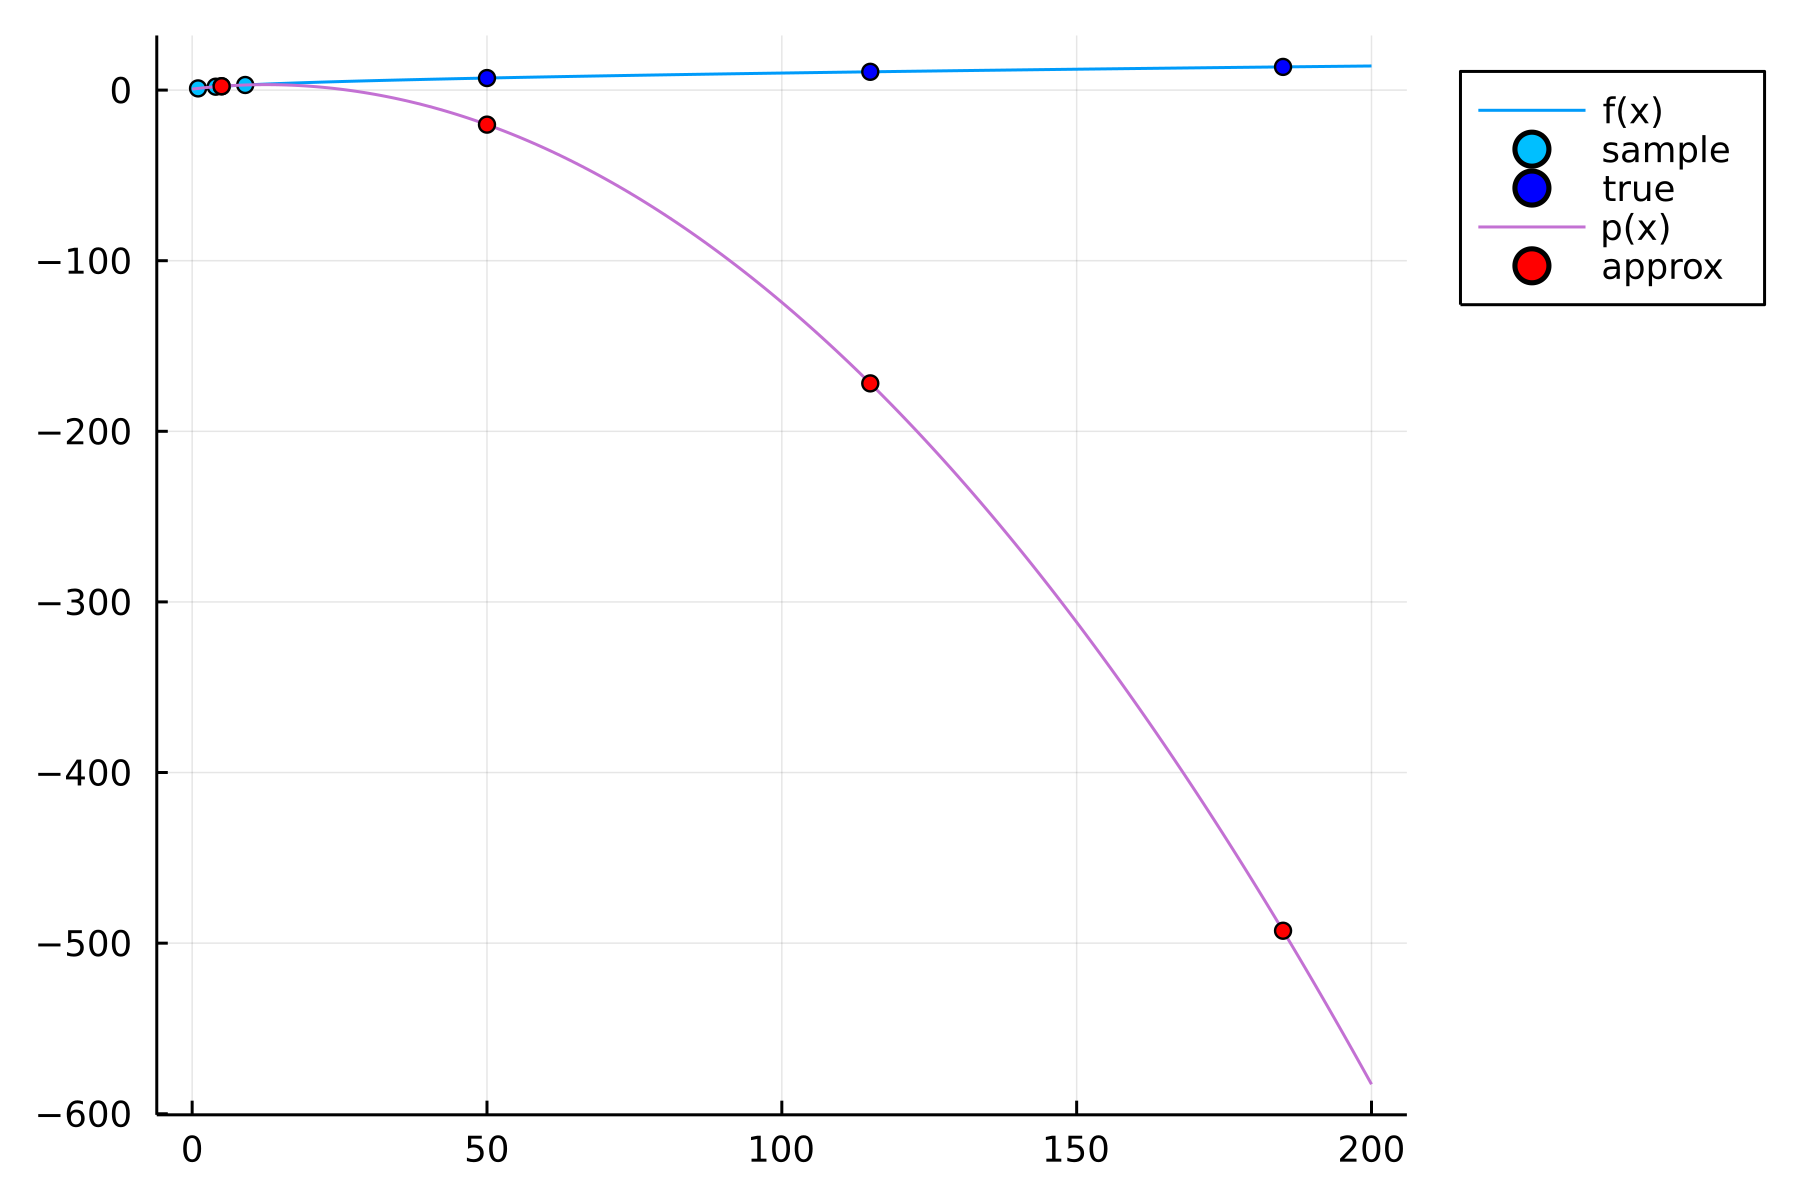

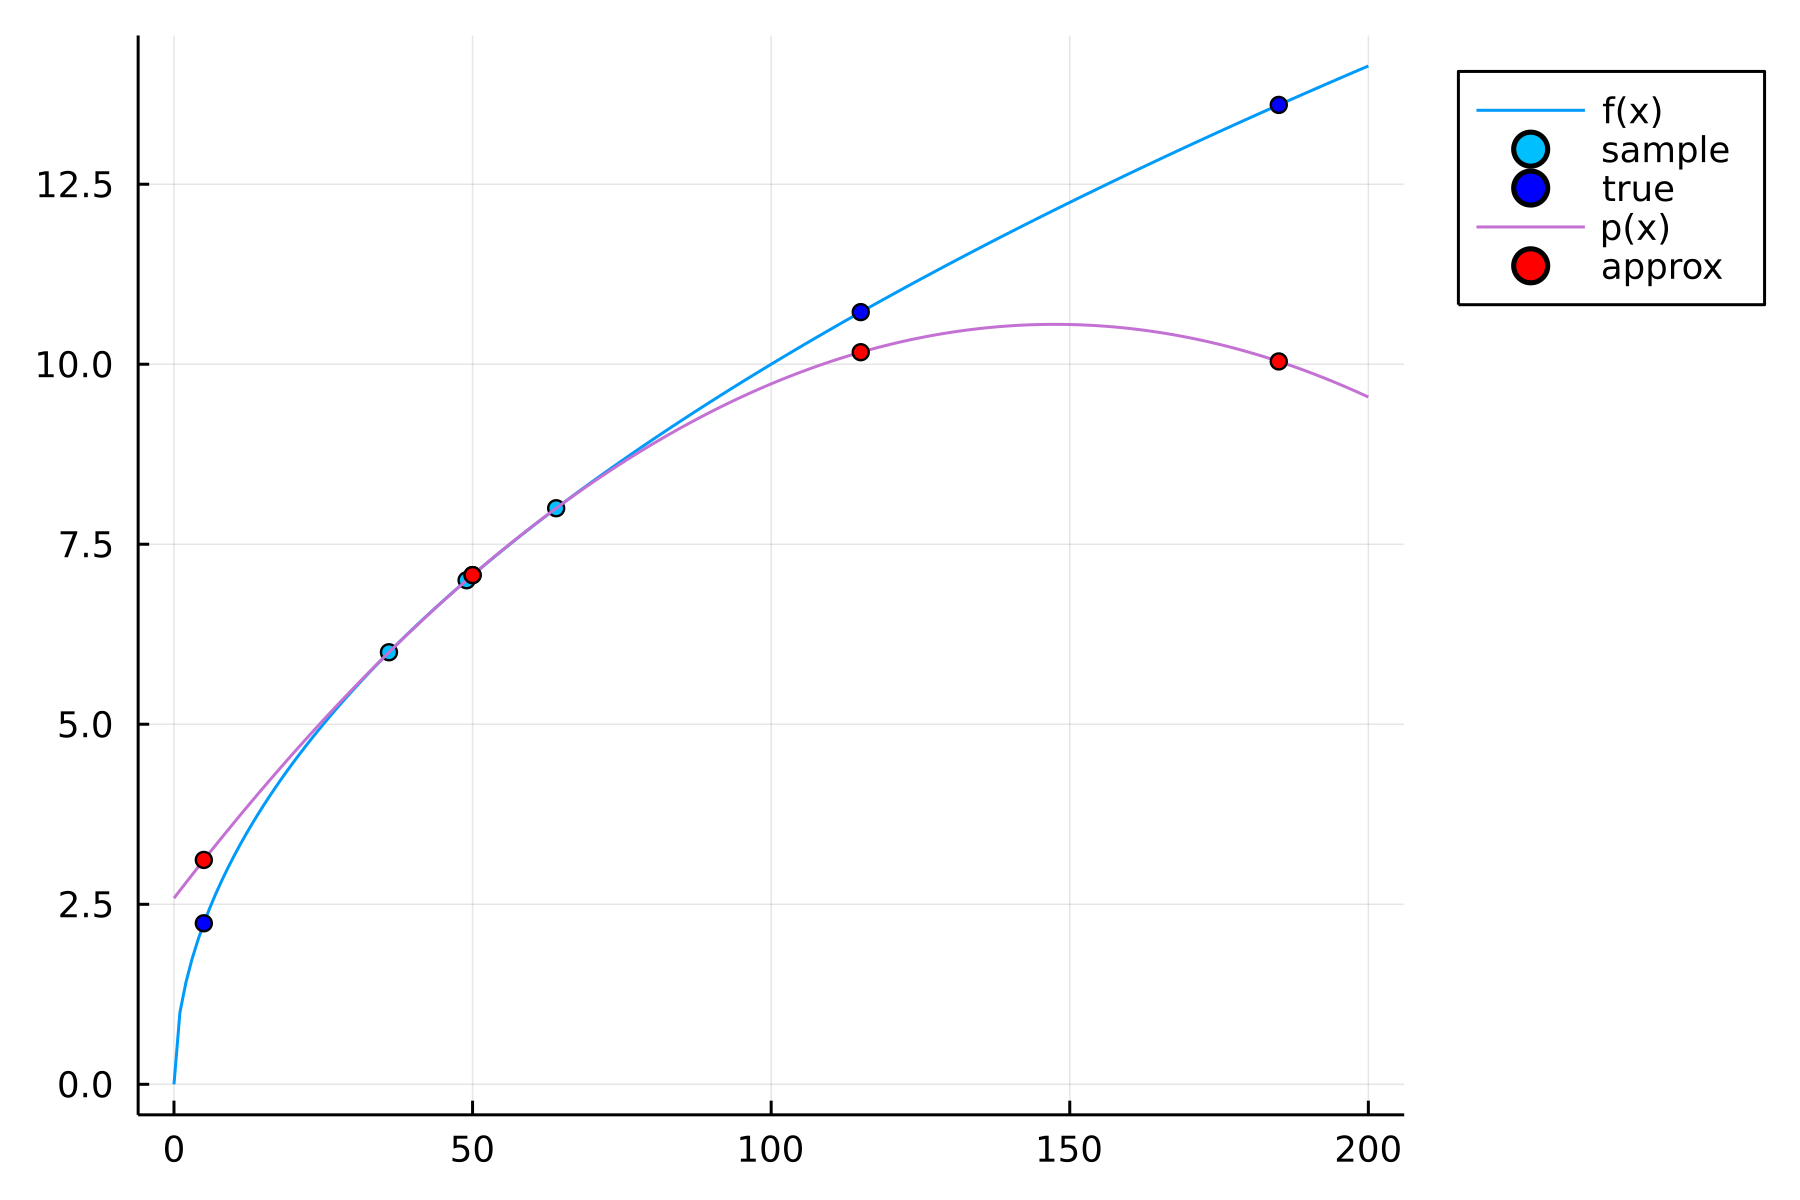

  0.072599 seconds (68.45 k allocations: 3.575 MiB, 99.94% compilation time)
pred_y=[2.2666666666666666, -20.23333333333332, -171.89999999999998, -492.7333333333331]
  0.000004 seconds (21 allocations: 1.906 KiB)
pred_y=[3.1157509157509153, 7.0717948717948715, 10.167032967032995, 10.038827838827785]


In [182]:
f(x) = sqrt(x)
split_xs = [1, 4, 9]
test_x = [5, 50, 115, 185]
xlim = [0, 200]
# ylim = [-1, 2]
ylim = []
show_result(f, nothing, split_xs, test_x, xlim, ylim)

f(x) = sqrt(x)
split_xs = [36, 49, 64]
test_x = [5, 50, 115, 185]
xlim = [0, 200]
# ylim = [-1, 2]
ylim = []
show_result(f, nothing, split_xs, test_x, xlim, ylim)

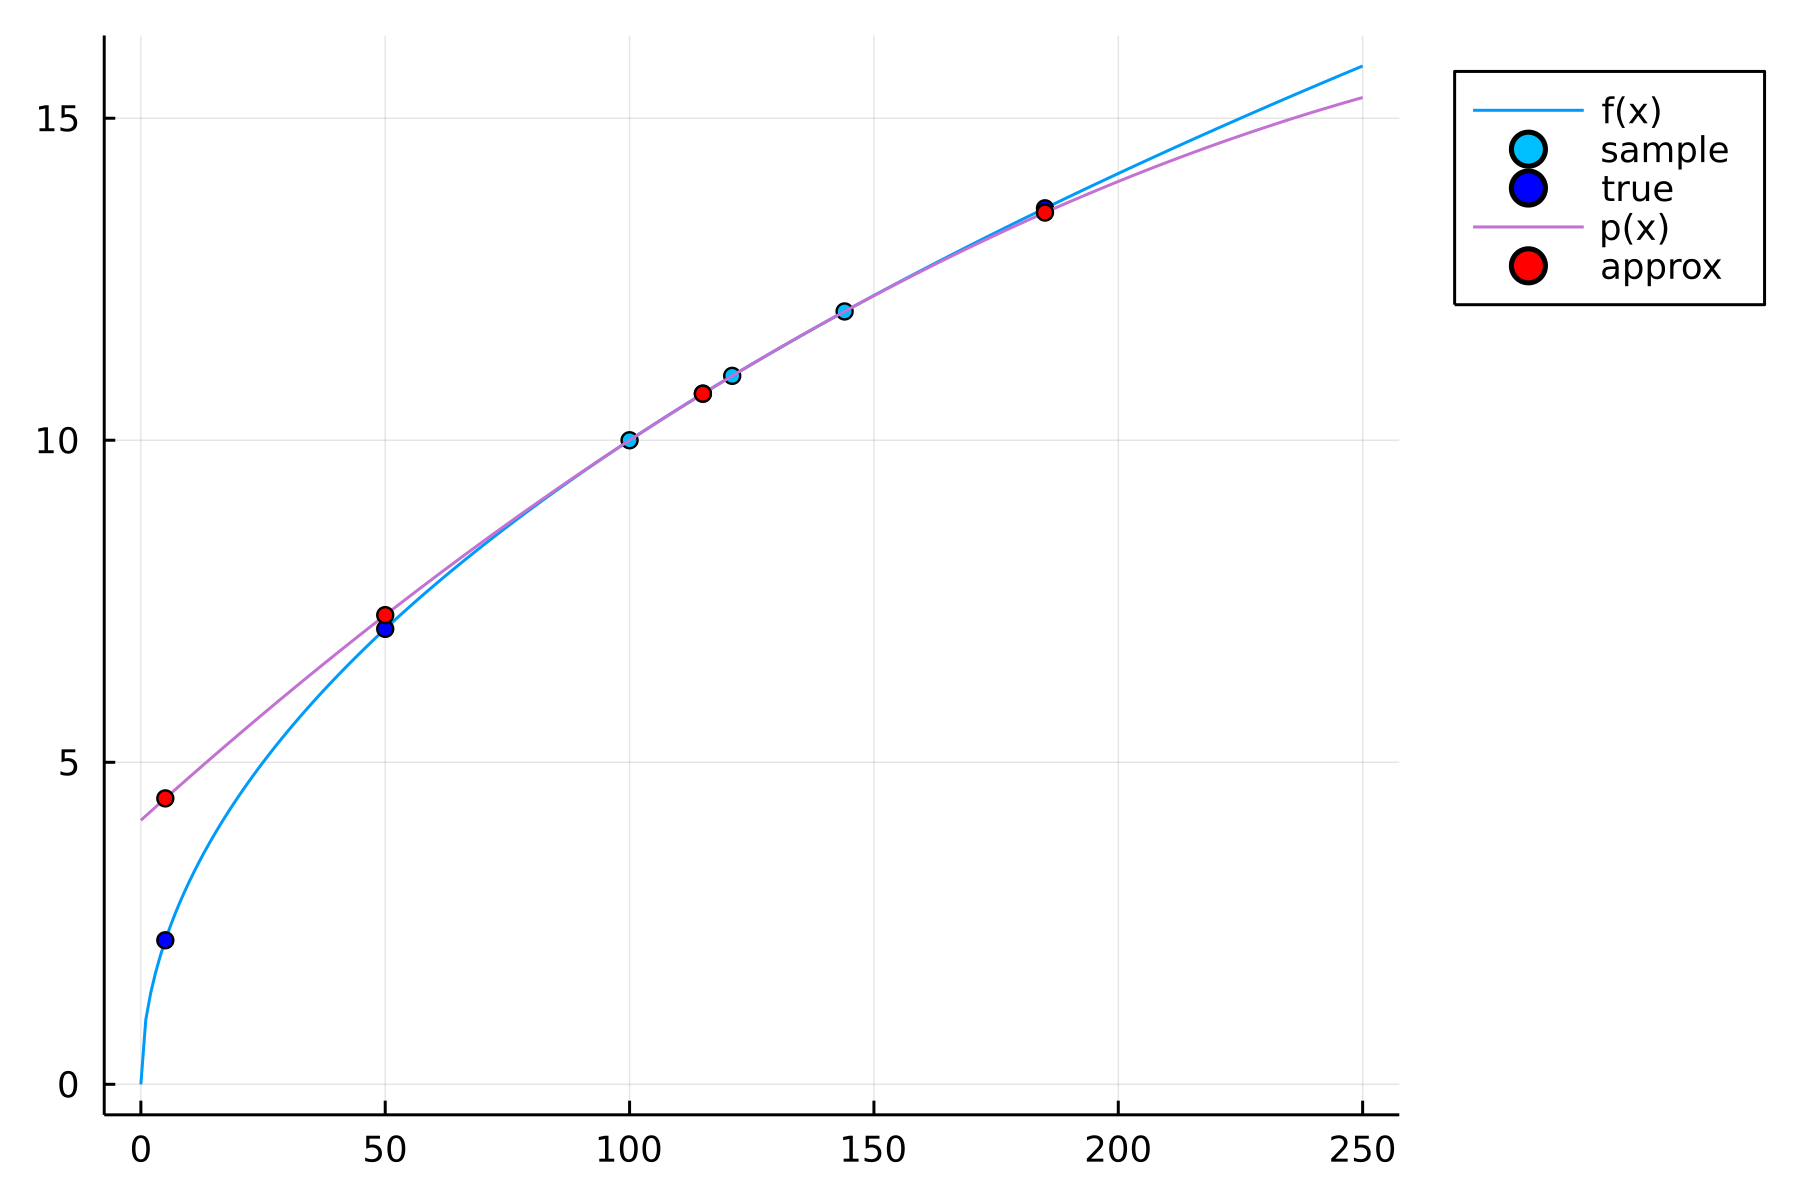

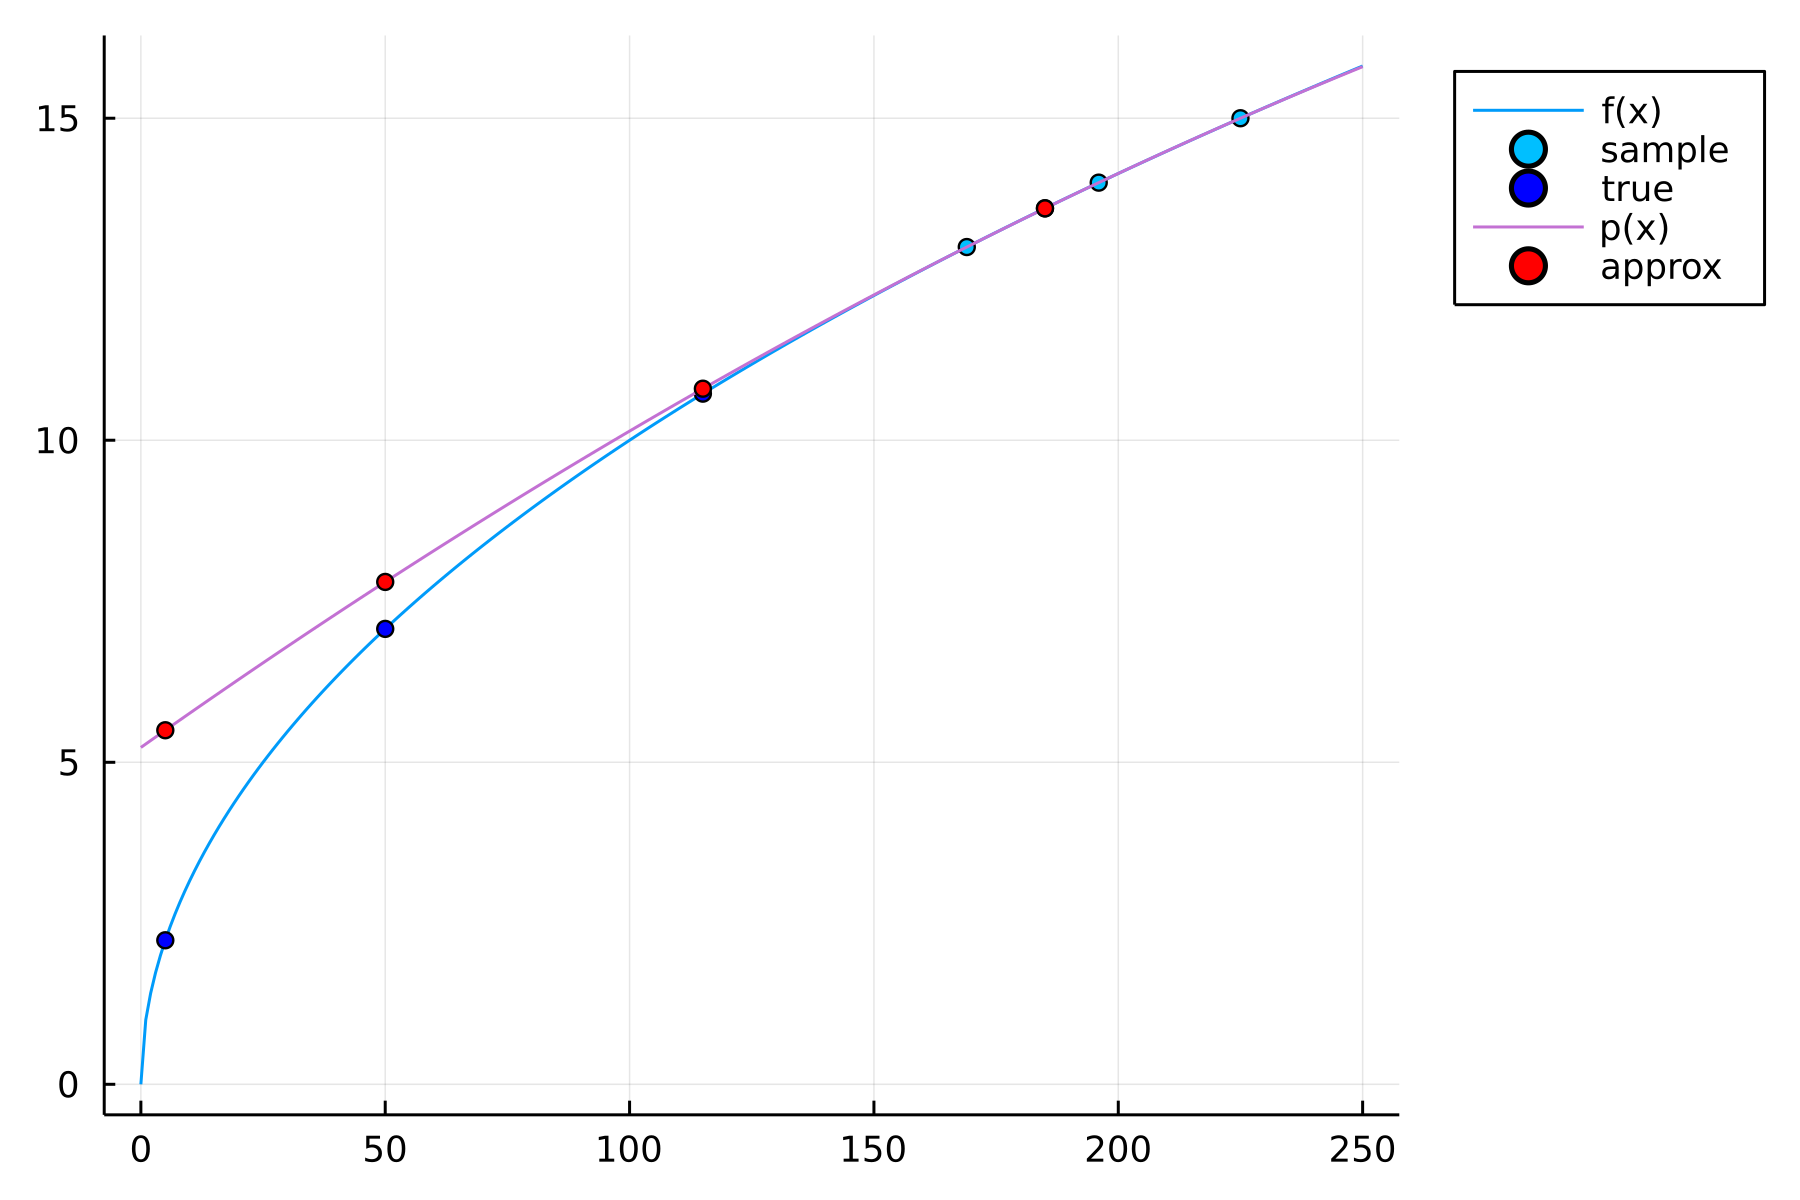

  0.000005 seconds (21 allocations: 1.906 KiB)
pred_y=[4.439111613024664, 7.284961415396204, 10.722755505364201, 13.535667231319408]
  0.000003 seconds (21 allocations: 1.906 KiB)
pred_y=[5.4971720488960045, 7.80012771392083, 10.800492610837438, 13.600620324758255]


In [183]:
f(x) = sqrt(x)
split_xs = [100, 121, 144]
test_x = [5, 50, 115, 185]
xlim = [0, 250]
# ylim = [-1, 2]
ylim = []
show_result(f, nothing, split_xs, test_x, xlim, ylim)

f(x) = sqrt(x)
split_xs = [169, 196, 225]
test_x = [5, 50, 115, 185]
xlim = [0, 250]
# ylim = [-1, 2]
ylim = []
show_result(f, nothing, split_xs, test_x, xlim, ylim)